In [79]:
#!pip install sentence_transformers
#!pip install keybert
#import nltk
#nltk.download('stopwords')
#!spacy download es_core_news_sm
#nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eduardo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

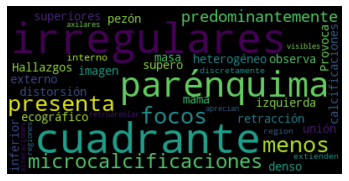

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from keybert import KeyBERT
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, pipeline
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
from spacy.matcher import Matcher
from spacy.lang.es import Spanish

sp_nlp = spacy.load('es_core_news_sm')
matcher = Matcher(sp_nlp.vocab)

stop_words = stopwords.words('spanish')
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
modelKeyBERT = KeyBERT('distilbert-base-nli-mean-tokens')

contexto_2 ="""
Hallazgos:

Se observa una masa con distorsión del parénquima en unión de los cuadrantes superiores de con la imagen ecográfico. Provoca retracción del pezón.
El parénquima de la mama izquierda es denso y heterogéneo y presenta al menos 4 focos de microcalcificaciones irregulares, predominantemente en el cuadrante supero externo. 
Presenta al menos 3 focos de calcificaciones irregulares, predominantemente en el cuadrante inferior interno. 
Algunas microcalcificaciones discretamente irregulares se extienden también a la region retroareolar.
No se aprecian alteraciones en las regiones axilares visibles.
 
"""

n_gram_range = (3, 3)
# Extract candidate words/phrases
count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([contexto_2])
candidates = count.get_feature_names()

doc_embedding = model.encode([contexto_2])
candidate_embeddings = model.encode(candidates)

top_n = 5
distances = cosine_similarity(doc_embedding, candidate_embeddings)
keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]

keywords = modelKeyBERT.extract_keywords(contexto_2)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black", stopwords=stopwords.words('spanish')).generate(contexto_2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.show()

model = 'mrm8488/bert-base-spanish-wwm-cased-finetuned-spa-squad2-es'
tokenizer = 'dccuchile/bert-base-spanish-wwm-cased'
nlp = pipeline(
    'question-answering', 
    model = model,
    tokenizer=( tokenizer , {"use_fast": True} )
)

nlp = pipeline('question-answering', model=model, tokenizer=tokenizer)

In [76]:
def find_lemmas(text):
    doc = sp_nlp(text)
    for token in doc:    
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma_:<{22}} {token.lemma_}')

def get_text_in_lemmas(text):
    doc = sp_nlp(text)
    return " ".join([token.lemma_ for token in doc])

def set_text_stopwords(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw = " ".join([token for token in [word for word in text_tokens if not word in stopwords.words('spanish')]])
    return " ".join([token for token in [word for word in word_tokenize(text) if not word in stopwords.words('spanish')]])

In [132]:
nodulo_simil = "nódulo,nodular,contorno nodular,Densidad nodular,Opacidad nodular,Radioopacidad nodular,Contornos oscurecidos,contornos lobulados,Nodulillo,Nodulito,Pseudonodular,espícula,Espiculado,Espiculación,Margen irregular,espiculaciones"
microcal_simil = "microcalcificación,microcalcificaciones,microcalcificaciones agrupadas,grupo de microcalcificaciones,Agrupación de microcalcificaciones,MCC,microcalcificaciones de reciente aparición,calcificación,calcificaciones"
asimetria_simil = "asimetría,asimetría focal,asimetría en desarrollo,asimetría global"
aumento_densidad_simil = "aumento de densidad radiológica difusa,Engrosamiento del patrón trabecular,Hiperdensidad difusa"
adenopatia_simil = "adenopatía,linfonodo aumentado de tamaño,Adenomegalia,adenopatía con microcalcificaciones"
distorsion_simil = "distorsión,Imagen espiculada,Retracción,Retracción del parénquima"
engrosamiento_cutaneo_simil = "engrosamiento cutáneo,Engrosamiento de la piel,Aumento del espesor de la piel"
retrac_cutanea_simil = "retracción cutánea,retracción de la piel,distorsión de la piel,distorsión cutánea"
retrac_pezon_simil = "retracción del pezón,inversión del pezón"


In [133]:
nodulo_lemmas = get_text_in_lemmas(nodulo_simil.lower()).split(',') 
print('nodulo_lemmas->',nodulo_lemmas)
microcal_lemmas = get_text_in_lemmas(microcal_simil.lower()).split(',') 
print('microcal_lammas->',microcal_lemmas)
asimetria_lemmas = get_text_in_lemmas(asimetria_simil.lower()).split(',') 
print('asimetria_lemmas->',asimetria_lemmas)
aumento_densidad_lemmas = get_text_in_lemmas(aumento_densidad_simil.lower()).split(',') 
print('aumento_densidad_lemmas->',aumento_densidad_lemmas)
adenopatia_lemmas = get_text_in_lemmas(adenopatia_simil.lower()).split(',') 
print('adenopatia_lemmas->',adenopatia_lemmas)
distorsion_lemmas = get_text_in_lemmas(distorsion_simil.lower()).split(',') 
print('distorsion_lemmas->',distorsion_lemmas)
engrosamiento_cutaneo_lemmas = get_text_in_lemmas(engrosamiento_cutaneo_simil.lower()).split(',') 
print('engrosamiento_cutaneo_lemmas->',engrosamiento_cutaneo_lemmas) 
retrac_cutanea_lemmas = get_text_in_lemmas(retrac_cutanea_simil.lower()).split(',') 
print('retrac_cutanea_lemmas->',retrac_cutanea_lemmas) 
retrac_pezon_lemmas = get_text_in_lemmas(retrac_pezon_simil.lower()).split(',') 
print('retrac_pezon_lemmas->',retrac_pezon_lemmas)

diccionario_hallazgos = (nodulo_lemmas, microcal_lemmas, asimetria_lemmas, aumento_densidad_lemmas, adenopatia_lemmas, distorsion_lemmas, engrosamiento_cutaneo_lemmas, retrac_cutanea_lemmas, retrac_pezon_lemmas )

nodulo_lemmas-> ['nódulo ', ' nodular ', ' contorno nodular ', ' densidad nodular ', ' opacidad nodular ', ' radioopacidad nodular ', ' contorno oscurecido ', ' contorno lobulado ', ' nodulillo ', ' nodulito ', ' pseudonodular ', ' espículir ', ' espiculado ', ' espiculación ', ' margen irregular ', ' espiculación']
microcal_lammas-> ['microcalcificación ', ' microcalcificación ', ' microcalcificación agrupada ', ' grupo de microcalcificación ', ' agrupación de microcalcificación ', ' mcc ', ' microcalcificación de reciente aparición ', ' calcificación ', ' calcificación']
asimetria_lemmas-> ['asimeter ', ' asimetría focal ', ' asimeter en desarrollo ', ' asimeter global']
aumento_densidad_lemmas-> ['aumento de densidad radiológico difús ', ' engrosamiento del patrón trabecular ', ' hiperdensidad difús']
adenopatia_lemmas-> ['adenopatía ', ' linfonodo aumentado de tamaño ', ' adenomegalio ', ' adenopatir con microcalcificación']
distorsion_lemmas-> ['distorsión ', ' imagen espiculado '

In [ ]:
modelKeyBERT.extract_keywords(contexto_2, keyphrase_ngram_range=(3, 3), stop_words=stopwords.words('spanish'),  use_mmr=True, diversity=0.7)

In [ ]:
modelKeyBERT.extract_keywords(contexto_2, keyphrase_ngram_range=(1, 1), stop_words=stopwords.words('spanish'))

In [ ]:
doc = sp_nlp(contexto_2)
for token in doc:    
    print(token.text, '\t',token.pos_, '\t',token.lemma, '\t', token.lemma_)

print(" ".join([token.lemma_ for token in doc]))

In [117]:
contexto_2 ="""
Hallazgos:

Se observa una masa con distorsión del parénquima en unión de los cuadrantes superiores de con la imagen ecográfico. Provoca retracción del pezón.
El parénquima de la mama izquierda es denso y heterogéneo y no presenta  focos de microcalcificaciones, predominantemente en el cuadrante supero externo. 
No presenta  focos de calcificaciones, predominantemente en el cuadrante inferior interno. 
Algunas microcalcificaciones discretamente irregulares se extienden también a la region retroareolar.
No se aprecian alteraciones en las regiones axilares visibles.
 
"""

In [90]:
ctx = set_text_stopwords(get_text_in_lemmas(contexto_2))
ctx = get_text_in_lemmas(contexto_2)

In [91]:
pregunta = '¿Existe calcificación?'
print(nlp({'question':pregunta, 'context':ctx}))
print(nlp({'question':pregunta, 'context':contexto_2}))


{'score': 0.09191851317882538, 'start': 381, 'end': 390, 'answer': 'irregular'}
{'score': 0.07252657413482666, 'start': 379, 'end': 390, 'answer': 'irregulares'}


In [93]:
pregunta = '¿ Existe microcalcificaciones ?'
print(nlp({'question':pregunta, 'context':ctx}))
print(nlp({'question':pregunta, 'context':contexto_2}))

{'score': 0.015502449125051498, 'start': 448, 'end': 497, 'answer': 'alguno microcalcificación discretamente irregular'}
{'score': 0.011304926127195358, 'start': 445, 'end': 499, 'answer': 'Algunas microcalcificaciones discretamente irregulares'}


In [ ]:
pregunta = '¿ existe microcalcificación ?'
print(nlp({'question':pregunta, 'context':ctx}))
print(nlp({'question':pregunta, 'context':contexto_2}))

In [95]:
pregunta = '¿ existe o hay microcalcificación ?'
print(nlp({'question':pregunta, 'context':ctx}))
print(nlp({'question':pregunta, 'context':contexto_2}))

{'score': 0.1282009333372116, 'start': 474, 'end': 497, 'answer': 'discretamente irregular'}
{'score': 0.14453212916851044, 'start': 453, 'end': 499, 'answer': 'microcalcificaciones discretamente irregulares'}


In [ ]:
pregunta = '¿ existe o hay  calcificación ?'
nlp({'question':pregunta, 'context':ctx})

In [96]:
pregunta = '¿ Qué tiene en la mama ?'
print(nlp({'question':pregunta, 'context':ctx}))
print(nlp({'question':pregunta, 'context':contexto_2}))

{'score': 0.048045188188552856, 'start': 236, 'end': 283, 'answer': 'al menos 4 foco de microcalcificación irregular'}
{'score': 0.09640541672706604, 'start': 238, 'end': 281, 'answer': '4 focos de microcalcificaciones irregulares'}


In [ ]:
pregunta = '¿ Hay nódulo ?'
nlp({'question':pregunta, 'context':ctx})

In [ ]:
pregunta = '¿ donde está el nódulo ?'
print(nlp({'question':pregunta, 'context':ctx}))
print(nlp({'question':pregunta, 'context':contexto_2}))

In [72]:
#buscar palabras magicas en el texto
# from spacy.matcher import Matcher
# sp_nlp = spacy.load('es_core_news_sm')
# matcher = Matcher(sp_nlp.vocab)
# doc = sp_nlp(contexto_2)

# #nodulo_pattern = [sp_nlp(text) for text in  nodulo_lemmas]

# nodulo_pattern = [{"TEXT": "microcalcificaciones"}, {"POS": "ADP"}]
# matcher.add("id1",  nodulo_pattern)

# matches = matcher(doc)

In [154]:
def find_lemmas(context):
    pos_arr = []
    set_hallazgos = set()
    for arr_lemmas in diccionario_hallazgos :
        for text in  arr_lemmas:
            #print('texto ',text.strip())
            sub_index = context.find(text.strip())
            if(sub_index > -1 and text not in set_hallazgos) :                
                new_obj = {"tipo":text, "hallazgo":get_ubicacion_hallazgo(context,text),"position":sub_index}
                #print(new_obj)
                pos_arr.append( new_obj )
                set_hallazgos.add(text)
    return pos_arr

def get_ubicacion_hallazgo(context, texto) :
   # pregunta = '¿ Tiene '+ texto +'?'
   # print(pregunta," ",nlp({'question':pregunta, 'context':context}))
   # hallazgo = nlp({'question':pregunta, 'context':context})    
    pregunta = '¿ donde está  '+ texto +'?'
    print(pregunta," ",nlp({'question':pregunta, 'context':context}))
    ubicacion = nlp({'question':pregunta, 'context':context})
    return {"ubicacion":ubicacion}

def get_sentimiento_hallazgo(texto) :
    return ""

In [155]:
#contexto_2 = get_text_in_lemmas(contexto_2)
contexto_2 ="""
Hallazgos:

Se observa una masa con distorsión del parénquima en unión de los cuadrantes superiores de con la imagen ecográfico. Provoca retracción del pezón.
El parénquima de la mama izquierda es denso y heterogéneo y  presenta  focos de microcalcificaciones, predominantemente en el cuadrante supero externo. 
No presenta  focos de calcificaciones, predominantemente en el cuadrante inferior interno. 
Algunas microcalcificaciones discretamente irregulares se extienden también a la region retroareolar.
No se aprecian alteraciones en las regiones axilares visibles.
 
"""
print(contexto_2)
find_lemmas(get_text_in_lemmas(contexto_2))

#get_text_in_lemmas(contexto_2)


Hallazgos:

Se observa una masa con distorsión del parénquima en unión de los cuadrantes superiores de con la imagen ecográfico. Provoca retracción del pezón.
El parénquima de la mama izquierda es denso y heterogéneo y  presenta  focos de microcalcificaciones, predominantemente en el cuadrante supero externo. 
No presenta  focos de calcificaciones, predominantemente en el cuadrante inferior interno. 
Algunas microcalcificaciones discretamente irregulares se extienden también a la region retroareolar.
No se aprecian alteraciones en las regiones axilares visibles.
 

¿ donde está  microcalcificación ?   {'score': 0.24869057536125183, 'start': 290, 'end': 317, 'answer': 'el cuadrante supero externo'}
¿ donde está   microcalcificación ?   {'score': 0.24869057536125183, 'start': 290, 'end': 317, 'answer': 'el cuadrante supero externo'}
¿ donde está   calcificación ?   {'score': 0.031595379114151, 'start': 361, 'end': 411, 'answer': 'predominantemente en el cuadrante inferior interno'}
¿ do

[{'tipo': 'microcalcificación ',
  'hallazgo': {'ubicacion': {'score': 0.24869057536125183,
    'start': 290,
    'end': 317,
    'answer': 'el cuadrante supero externo'}},
  'position': 248},
 {'tipo': ' microcalcificación ',
  'hallazgo': {'ubicacion': {'score': 0.24869057536125183,
    'start': 290,
    'end': 317,
    'answer': 'el cuadrante supero externo'}},
  'position': 248},
 {'tipo': ' calcificación ',
  'hallazgo': {'ubicacion': {'score': 0.031595379114151,
    'start': 361,
    'end': 411,
    'answer': 'predominantemente en el cuadrante inferior interno'}},
  'position': 253},
 {'tipo': ' calcificación',
  'hallazgo': {'ubicacion': {'score': 0.031595379114151,
    'start': 361,
    'end': 411,
    'answer': 'predominantemente en el cuadrante inferior interno'}},
  'position': 253},
 {'tipo': 'distorsión ',
  'hallazgo': {'ubicacion': {'score': 0.2067103087902069,
    'start': 68,
    'end': 128,
    'answer': 'en unión de el cuadrant superior de con el imagen ecográfico'}}

In [112]:
contexto_2.find('microcalcificación')

258